# 🔢 Character-Level Text Generation with RNNs

In this notebook, we'll build a simple **Recurrent Neural Network (RNN)** using **Keras** to generate text character by character. The model will learn patterns in text and try to predict the next character in a sequence.

## 📘 1. Data Selection
We'll use a small text corpus for this example — a short excerpt from *Alice in Wonderland* to keep training fast and easy to visualize.

In [ ]:
with open('data.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print(f"Corpus length: {len(text)} characters")
print(text[:200])

Corpus length: 148574 characters
Alice's Adventures in Wonderland

                ALICE'S ADVENTURES IN WONDERLAND

                          Lewis Carroll

               THE MILLENNIUM FULCRUM EDITION 3.0




                     


## 🧹 2. Data Preprocessing
We’ll convert the text into sequences of characters and map each unique character to an integer ID.

**Steps:**
1. Create a vocabulary of unique characters.
2. Map characters to indices and vice versa.
3. Create fixed-length input sequences and their corresponding target characters.
4. One-hot encode the input and target sequences.

In [ ]:
import numpy as np

# Create character vocabulary
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(f"Unique characters: {vocab_size}")

# Create mapping of characters to integers
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

# Sequence length
seq_length = 40
step = 3  # step size to create overlapping sequences

sentences = []
next_chars = []
for i in range(0, len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

print(f"Number of sequences: {len(sentences)}")

Unique characters: 72
Number of sequences: 49512


In [ ]:
# Vectorization (one-hot encoding)
x = np.zeros((len(sentences), seq_length, vocab_size), dtype=np.bool_)
y = np.zeros((len(sentences), vocab_size), dtype=np.bool_)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

print(f"Input shape: {x.shape}, Target shape: {y.shape}")

Input shape: (49512, 40, 72), Target shape: (49512, 72)


## 💻 3. Building and Training the RNN

We'll use **Keras** with a simple RNN layer to predict the next character.

**Architecture:**
- One RNN layer (64 units)
- Dense layer with Softmax activation for next-character probabilities

We'll use **categorical crossentropy** as the loss function and **Adam** optimizer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential([
    SimpleRNN(64, input_shape=(seq_length, vocab_size)),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         8,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 72)             │         4,680 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,448 (52.53 KB)

 Trainable params: 13,448 (52.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 2.7622
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.0729
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.9533
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.8769
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.8312
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.7988
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.7583
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.7395
Epoch 9/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.7241
Epoch 10/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.6997
Epoch 11/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.6945
Epoch 12/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.6956
Epoch 13/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.6781
Epoch 14/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.6648
Epoch 15/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

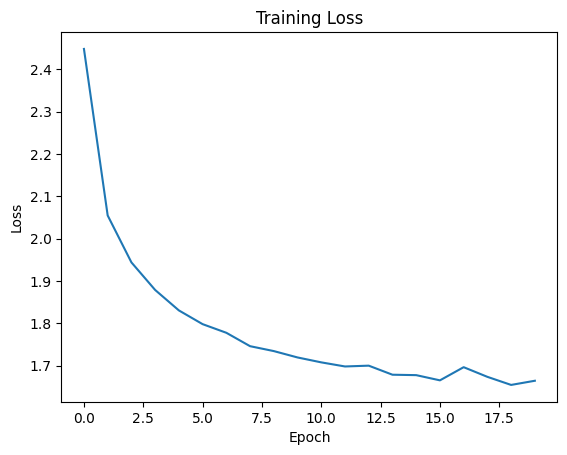

In [ ]:
# Train the model
history = model.fit(x, y, batch_size=128, epochs=20)

# Plot loss curve
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## 🚀 4. Generating New Text
Now comes the fun part — text generation!

**Steps:**
1. Choose a seed string.
2. Feed it to the trained model.
3. Predict the next character.
4. Append it to the sequence and repeat.

We’ll define a helper function to generate text using the trained model.

In [ ]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def generate_text(seed, length=300, temperature=0.5):
    generated = seed
    print(f"Seed: '{seed}'\n")
    for i in range(length):
        x_pred = np.zeros((1, seq_length, vocab_size))
        for t, char in enumerate(seed):
            if char in char_to_idx:
                x_pred[0, t, char_to_idx[char]] = 1
        preds = model.predict(x_pred, verbose=0)[0]
        next_idx = sample(preds, temperature)
        next_char = idx_to_char[next_idx]
        generated += next_char
        seed = seed[1:] + next_char
    return generated

In [ ]:
# Try generating text
seed_text = "The"
generated_text = generate_text(seed_text, length=400, temperature=0.7)
print(generated_text)

Seed: 'The'

The.teeyiteeertueseoe-e,e e u ee,oeese e .sete e e e. issiieeeie ,liei eo eo.ol oeese.oe-e,si e ie   e eseoee.l ie   e   i eoiei e,eeereloel ee
.oleeeroeiiieeerse ileseaeeie seeliiee  ieeeeru osi e o ee  .eue sei en ioe,- tuaeeereeeeeu i eoieeeru leeiie   e iieeeu.a e e sei iei eoiieeeereuee   e leeie,eeie .i,e:ereie'ieeie  ,o:seoaiiei eaeeie ,seeeru ai  e e e,iee   e ie e e ie !i u iiy aiieee :ee   


## 🧠 Discussion
- The RNN learns simple character patterns — spaces, punctuation, and some common letter combinations.
- However, it struggles with **long-term dependencies** and coherence over long text.
- This leads naturally to exploring **LSTMs** and **GRUs**, which handle memory and long-term relationships much better.